# Name : Manish Jayswal
# SR No.: 18844
# Degree : M.Tech Coursework(CDS)
# Subject : Numerical Optimization Assignment#1

# Importing necessary python libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error

In [2]:
#loading dataset
data = np.load('data_x.npy')

# Q1.1 : Histogram and Gaussian Fit plot

(array([ 1.,  4.,  4.,  4.,  6., 10., 14., 27., 29., 39., 44., 63., 62.,
        88., 67., 86., 70., 83., 56., 54., 50., 36., 28., 22., 16., 13.,
         9.,  8.,  4.,  3.]),
 array([29.53856945, 31.47373551, 33.40890156, 35.34406762, 37.27923368,
        39.21439973, 41.14956579, 43.08473185, 45.0198979 , 46.95506396,
        48.89023001, 50.82539607, 52.76056213, 54.69572818, 56.63089424,
        58.5660603 , 60.50122635, 62.43639241, 64.37155846, 66.30672452,
        68.24189058, 70.17705663, 72.11222269, 74.04738875, 75.9825548 ,
        77.91772086, 79.85288692, 81.78805297, 83.72321903, 85.65838508,
        87.59355114]),
 <BarContainer object of 30 artists>)

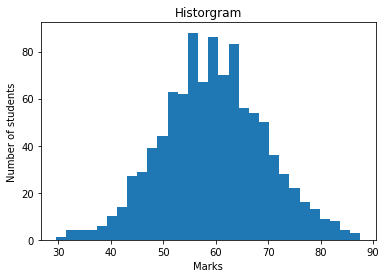

In [3]:
mean, std = norm.fit(data) #calculating mean and standard deviation
plt.xlabel("Marks")
plt.ylabel("Number of students")
plt.title("Historgram")
plt.hist(data,bins = 30)

In [4]:
y =[]
for i in data:
    exp_term = np.exp((-1/2)*((i-mean)/std)**2)
    denominator_term = std * (2*np.pi)**(1/2)
    y.append(exp_term/denominator_term) #calculating y as per given equation and storing in a list 

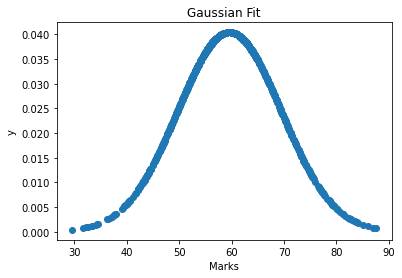

In [5]:
plt.scatter(data,y)
plt.title("Gaussian Fit")
plt.xlabel("Marks")
plt.ylabel("y")
plt.show()

# Q1.2(a)

In [6]:
train_data = data[:750]
test_data = data[750:]
train_y = y[:750]
test_y = y[750:]
beta_750 = []

In [7]:
train_data = np.reshape(train_data,newshape=(750,1))
test_data = np.reshape(test_data,newshape=(250,1))
train_y = np.reshape(train_y,newshape=(750,1))
test_y = np.reshape(test_y,newshape=(250,1))


In [8]:
order = list(range(1,16))

In [9]:
MSE = []  # list to store mean squared error
for n in order: # here n is the order of polynomial
    A = np.zeros((len(train_y),n+1))
    for i in range(len(train_y)):
        for j in range(n+1):
            A[i][j] = train_data[i]**j
    test_A = np.zeros((len(test_y),n+1))
    for i in range(len(test_y)):
        for j in range(n+1):
            test_A[i][j] = test_data[i]**j
    
    A_T = np.transpose(A)
    B_calculated = (np.linalg.pinv(A_T @ A) @ A_T) @ train_y
    
    predicted_y = test_A @ B_calculated
    MSE.append( mean_squared_error(test_y, predicted_y)) 
    

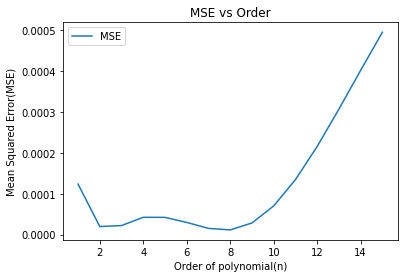

In [10]:
# plotting
plt.plot(order,MSE)
plt.xlabel('Order of polynomial(n)')
plt.ylabel('Mean Squared Error(MSE)')
plt.title('MSE vs Order')
plt.legend(["MSE"])
plt.show()

In [11]:
min_mse = min(MSE)
for i in range(len(MSE)):
    if MSE[i] == min_mse:
        min_order= order[i]

In [12]:
print("The required minimum MSE is : {}".format(min_mse)) 
print("The order of polynomial corresponding to minimum MSE is : {}".format(min_order))                 

The required minimum MSE is : 1.1401464001754011e-05
The order of polynomial corresponding to minimum MSE is : 8


# Q1.2(b) : Solving the least sqaures problem using the Cholesky Decomposition for optimal 'n' found in Q1.2(a)

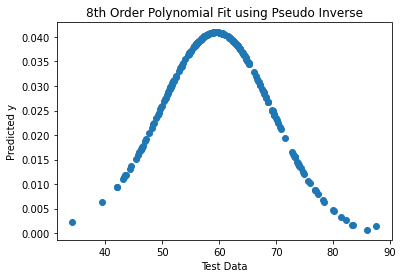

In [13]:
n = 8
A1 = np.zeros((len(train_y),n+1))
for i in range(len(train_y)):
    for j in range(n+1):
        A1[i][j] = train_data[i]**j

test_A1 = np.zeros((len(test_y),n+1))
for i in range(len(test_y)):
    for j in range(n+1):
        test_A1[i][j] = test_data[i]**j
A1_T = np.transpose(A1)
B_calculated1 = (np.linalg.inv(A1_T @ A1) @ A1_T) @ train_y

predicted_y1 = test_A1 @ B_calculated1
plt.scatter(test_data, predicted_y1)
plt.title("8th Order Polynomial Fit using Pseudo Inverse")
plt.xlabel("Test Data")
plt.ylabel("Predicted y")
plt.show()


In [14]:
# Importing and using builtin function for computing cholesky decomposition
from scipy.linalg import cho_factor, cho_solve
c, low = cho_factor(np.transpose(A1) @ A1)
B_calculated_cho = cho_solve((c, low), np.transpose(A1) @ train_y)
predicted_y1_cho = test_A1 @ B_calculated_cho

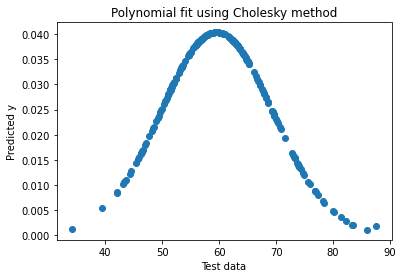

In [15]:
# plot for cholesky method
plt.scatter(test_data, predicted_y1_cho)
plt.xlabel('Test data')
plt.ylabel('Predicted y')
plt.title('Polynomial fit using Cholesky method')
plt.show()


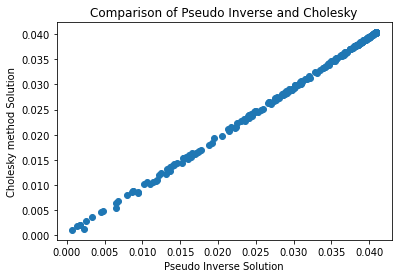

In [16]:
plt.scatter(predicted_y1, predicted_y1_cho)
plt.xlabel('Pseudo Inverse Solution')
plt.ylabel('Cholesky method Solution')
plt.title('Comparison of Pseudo Inverse and Cholesky')
plt.show()


We can see that Pseudo inverse solution is almost matching with Cholesky method solution except for few points.

# Q2 : Portfolio Optimization 

# Q2(a) : Formulating the optimization problem
 Here, 
 
 # Our Objective function : Minimize Portfolio variance(i.e. risk)
 
 where, Portfolio variance = (transpose of weighted mean of returns)*(covariance matrix)*(weighted mean of returns)
 
 # Subject to Constraints:
 
 a. Sum of the weight of stock split = 1 (i.e. Equality Constraint)
 
 b. Lower limit on weight of stock split >= 0 (i.e. Inequality Constraint)
 
 c. Upper limit on weight of stock split <= 1 (i.e. Inequality Constraint)
 
 d. Expected Annual Return >= 60% (i.e. Inequality Constraint)

In [17]:
# Loading dataset for meanvector and covariance matrix
Mean_Vec = np.load('avg.npy')
Cov_Mat = np.load('cov.npy')

stocks=['A','B','C','D','E','F','G','H','I','J']

# Assigning arbitrary weight for 10 stocks as 0.1 each
wt = [0.1]*10

# Initializing expected annual return and weighted average sum to 0
exp_annual_return = 0
weighted_avg_sum = 0

for i in range(10):
    weighted_avg_sum += Mean_Vec[i] * wt[i]

# Using Number of trading days in a year as 252    
exp_annual_return = weighted_avg_sum * 252
print("Expected Annual return is {} :".format(exp_annual_return))

Expected Annual return is [91.80224247] :


In [18]:
weighted_avg = [] #list to store weighted mean
for i in range(10):
    weighted_avg.append(wt[i] * Mean_Vec[i])
weighted_avg = np.array(weighted_avg) #converting list to numpy array

# Calculating portfolio Risk
weighted_avg_T =  np.transpose(weighted_avg)
portfolio_var_annual = np.sqrt(weighted_avg_T @ Cov_Mat @ weighted_avg) * 252**0.5
print("Annual Portfolio risk is {} ".format(portfolio_var_annual))

Annual Portfolio risk is [[10.20533656]] 


# Q2(b) : Portfolio optimization using cvxopt library

In [19]:
# Using our objective function and constraints to initialize matrices used in solver
A = np.ones((1,10))
b = np.ones((1,1))
G = -1*np.transpose(Mean_Vec)
H = [-60/252]
min_return_matrix = np.zeros((10,10))

for i in range(10):
    min_return_matrix[i,i] = Mean_Vec[i]

P = min_return_matrix @ (2*Cov_Mat) @ min_return_matrix
q = np.zeros((10,1))
l = np.ones((10,1))
k = np.identity(10)
s = -1*np.identity(10)
G_ = np.vstack((k,G,s))
H_ = np.vstack((l,H,q))

# importing solvers and matrix from cvxopt library
from cvxopt import solvers, matrix
A = matrix(A)
b = matrix(b)
G_ = matrix(G_)
H_ = matrix(H_)
P = matrix(P)
q = matrix(q)

result = solvers.qp(P, q, G_, H_, A, b)
print(result)

     pcost       dcost       gap    pres   dres
 0:  5.7690e-02 -1.1779e+01  5e+01  2e+00  3e+00
 1:  3.3137e-01 -4.5808e+00  5e+00  3e-16  1e-15
 2:  2.2207e-01 -3.7666e-01  6e-01  2e-16  1e-15
 3:  1.6152e-01  9.7045e-02  6e-02  1e-16  7e-16
 4:  1.4884e-01  1.3157e-01  2e-02  1e-16  7e-14
 5:  1.4591e-01  1.4502e-01  9e-04  2e-16  2e-14
 6:  1.4572e-01  1.4569e-01  3e-05  2e-16  1e-13
 7:  1.4571e-01  1.4571e-01  7e-07  2e-16  1e-12
 8:  1.4571e-01  1.4571e-01  7e-09  2e-16  5e-12
Optimal solution found.
{'x': <10x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <21x1 matrix, tc='d'>, 'z': <21x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 7.341869823847632e-09, 'relative gap': 5.03858395047682e-08, 'primal objective': 0.1457129674911762, 'dual objective': 0.14571296014930632, 'primal infeasibility': 2.220446049250313e-16, 'dual infeasibility': 4.92496834032681e-12, 'primal slack': 2.848095905414202e-11, 'dual slack': 4.4657281954283206e-11, 'iterations': 8}


In [20]:
optimal_weight_split = result['x']
weighted_avg_sum = 0 

# After Optimization, annual return 
for i in range(10):
    weighted_avg_sum += optimal_weight_split[i] * Mean_Vec[i]
optimised_annual_return = weighted_avg_sum * 252
print("Hence the Optimised  annual return is {}".format(optimised_annual_return))

Hence the Optimised  annual return is [60.00000001]


In [21]:
# After Optimization, the portfolio variance(i.e. risk) 
weighted_avg = []
for i in range(10):
    weighted_avg.append(optimal_weight_split[i] * Mean_Vec[i])

weighted_avg = np.array(weighted_avg) #converting list into numpy array
weighted_avg_T = np.transpose(weighted_avg)
annual_portfolio_var = np.sqrt(weighted_avg_T @ Cov_Mat @ weighted_avg) * 252**0.5
print("The annual portfolio variance(i.e. risk) is minimised to : {}".format(annual_portfolio_var))

The annual portfolio variance(i.e. risk) is minimised to : [[6.05967555]]


# The predicted optimal split of money to be invested(in %) among given stocks so that we have a minimum return of atleast 60% is give below:

In [22]:
for i in range(10):
    print("{} : {:.2f}".format(stocks[i], 100*optimal_weight_split[i]))

A : 0.00
B : 7.19
C : 0.00
D : 2.70
E : 0.00
F : 0.00
G : 14.42
H : 0.96
I : 21.74
J : 52.99


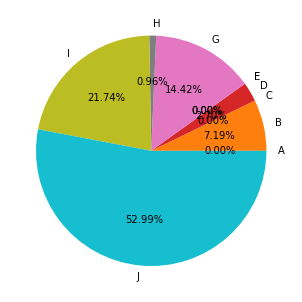

In [23]:
# Using pie-chart to show the optimal weight split of money to be invested among stocks
figure = plt.figure()
langs = stocks
ax = figure.add_axes([0,0,1,1])
ax.pie([k for k in optimal_weight_split], labels = langs, autopct = '%1.2f%%')
plt.show()
